<a href="https://colab.research.google.com/github/aliyaaliyal/mesin-learning/blob/main/Image_Classification_Chessmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

library keras menyediakan ImageDataGenerator yang dapat mempermudah kita dalam memproses data untuk model kita. 

latihan membuat model untuk memprediksi dataset chessman 

In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-11-24 14:56:14--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-11-24 14:56:14--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   220MB/s    in 

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

 fungsi listdir dari kelas os untuk melihat direktori yang terdapat pada dataset

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Queen', 'Bishop', 'Rook', 'Pawn', 'Knight', 'King']

melihat berapa banyak gambar pada setiap direktori. Dari output dapat dilihat bahwa jumlah sampel pada tiap direktori berbeda. Perlu diperhatikan juga dataset ini berukuran sangat kecil sehingga performa dari model mungkin tidak akan terlalu baik. Kita akan mencoba menggunakan augmentasi gambar untuk mengatasi masalah ini.

In [4]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


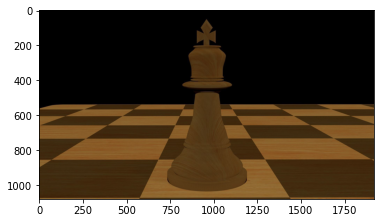

In [7]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = tf.keras.utils.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset

Perhatikan bahwa ada parameter yaitu validation split

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

Dataset yang kita miliki hanya terdiri dari 1 buah direktori dan tidak terbagi menjadi direktori training dan testing.
dengan ImageDataGenerator kita tidak perlu susah payah membagi direktori secara manual, cukup dengan menggunakan parameter validation_split yang disebut pada paragraf sebelumnya. Dengan parameter tersebut, kita hanya cukup memberi tahu ImageDataGenerator mana data untuk training dan mana data untuk testing dengan menambahkan parameter subset dengan nilai training atau validation.


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

Found 499 images belonging to 6 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 52 images belonging to 6 classes.


membuat arsitektur dari model. Untuk model ini menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.


In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan model

In [14]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

gunakan fungsi fit untuk melatih model.

In [15]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 35s - loss: 1.8197 - accuracy: 0.1864 - val_loss: 1.7882 - val_accuracy: 0.1923 - 35s/epoch - 553ms/step
Epoch 2/50
63/63 - 36s - loss: 1.8132 - accuracy: 0.1884 - val_loss: 1.7863 - val_accuracy: 0.1923 - 36s/epoch - 573ms/step
Epoch 3/50
63/63 - 33s - loss: 1.7842 - accuracy: 0.1804 - val_loss: 1.7752 - val_accuracy: 0.1923 - 33s/epoch - 529ms/step
Epoch 4/50
63/63 - 33s - loss: 1.7726 - accuracy: 0.2104 - val_loss: 1.7592 - val_accuracy: 0.2885 - 33s/epoch - 527ms/step
Epoch 5/50
63/63 - 33s - loss: 1.7224 - accuracy: 0.2585 - val_loss: 1.7354 - val_accuracy: 0.2692 - 33s/epoch - 526ms/step
Epoch 6/50
63/63 - 33s - loss: 1.7153 - accuracy: 0.2525 - val_loss: 1.7833 - val_accuracy: 0.2500 - 33s/epoch - 525ms/step
Epoch 7/50
63/63 - 37s - loss: 1.6690 - accuracy: 0.2966 - val_loss: 1.7259 - val_accuracy: 0.3654 - 37s/epoch - 588ms/step
Epoch 8/50
63/63 - 35s - loss: 1.6237 - accuracy: 0.3287 - val_loss: 1.6414 - val_accuracy: 0.3269 - 35s/epoch - 549ms/step
Epoch 9/

membuat plot akurasi dari model

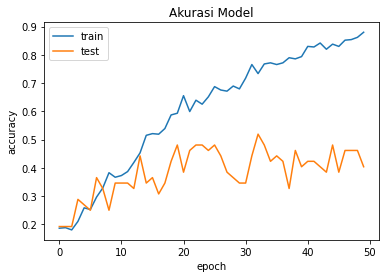

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

membuat plot loss 

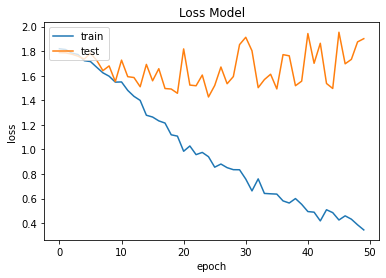

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hasil dari model classification: Akurasi yang didapat sekitar 50% di mana model akan membuat sekitar 50 persen prediksi yang salah. 